In [1]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#IMPORTING CSV FILE

df=pd.read_csv('Amazon Sale Report.csv',encoding= 'unicode_escape')


In [3]:
df.shape     #returns the shape of the dataframe(rows,columns)

(30866, 24)

In [4]:
df.head()     #returns the top rows (by defualt top 5 rows)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.info()         #returns the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30866 entries, 0 to 30865
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               30866 non-null  int64  
 1   Order ID            30866 non-null  object 
 2   Date                30866 non-null  object 
 3   Status              30866 non-null  object 
 4   Fulfilment          30866 non-null  object 
 5   Sales Channel       30866 non-null  object 
 6   ship-service-level  30866 non-null  object 
 7   Style               30866 non-null  object 
 8   SKU                 30866 non-null  object 
 9   Category            30866 non-null  object 
 10  Size                30866 non-null  object 
 11  ASIN                30866 non-null  object 
 12  Courier Status      28935 non-null  object 
 13  Qty                 30865 non-null  float64
 14  currency            28965 non-null  object 
 15  Amount              28965 non-null  float64
 16  ship

In [6]:
#DELETING THE COLUMNS

col = ['Unnamed: 22', 'promotion-ids', 'ASIN', 'index', 'fulfilled-by', 'Sales Channel ']
df.drop(columns=col, inplace=True)

In [7]:
#CHECKING FOR NULL VALUES

pd.isnull(df).sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0
Courier Status,1931


In [8]:
# DROPPING ALL THE NULL VALUES

df.dropna(inplace=True)

In [10]:
# AGAIN CHECKING FOR NULL VALUES

pd.isnull(df).sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0
Courier Status,0


In [11]:
print(df.dtypes)   # returns the data type of the columns

Order ID               object
Date                   object
Status                 object
Fulfilment             object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
Courier Status         object
Qty                   float64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                    object
dtype: object


In [12]:
# CHANGING DATA TYPE

df['Date']=pd.to_datetime(df['Date'], format='%m-%d-%y')
df['B2B'] = df['B2B'].astype(bool)

In [13]:
print(df.dtypes)

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
Courier Status                object
Qty                          float64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
dtype: object


In [14]:
df.columns



Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'Courier Status', 'Qty', 'currency',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country',
       'B2B'],
      dtype='object')

In [15]:
#RENAMING COLUMNS

rename_col={'Order ID':'order_id',
            'Date':'date',
            'Status':'status',
            'Fulfilment':'fulfillment',
            'ship-service-level':'ship_service_level',
            'Style':'style',
            'SKU':'sku',
            'Category':'category',
            'Size':'size',
            'Courier Status':'courier',
            'Qty':'qty',
            'Currency':'currency',
            'Amount':'amt',
            'ship-city':'ship_city',
            'ship-state':'ship_state',
            'ship-postal-code':'ship_postal_code',
            'ship-country':'ship_country',
            'B2B':'b2b'}
df.rename(columns=rename_col, inplace=True)
print(df.columns)

Index(['order_id', 'date', 'status', 'fulfillment', 'ship_service_level',
       'style', 'sku', 'category', 'size', 'courier', 'qty', 'currency', 'amt',
       'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'b2b'],
      dtype='object')


In [16]:
#STANDARDISING THE VALUES TO LOWERCASE

df['fulfillment'] = df['fulfillment'].str.lower()

In [18]:
df['fulfillment'].head()         #returns the top 5 values of the columns'fulfillment'

,fulfillment
1,merchant
2,amazon
4,amazon
5,amazon
6,amazon


DATA VISUALISATION:


TIME SERIES ANALYSIS

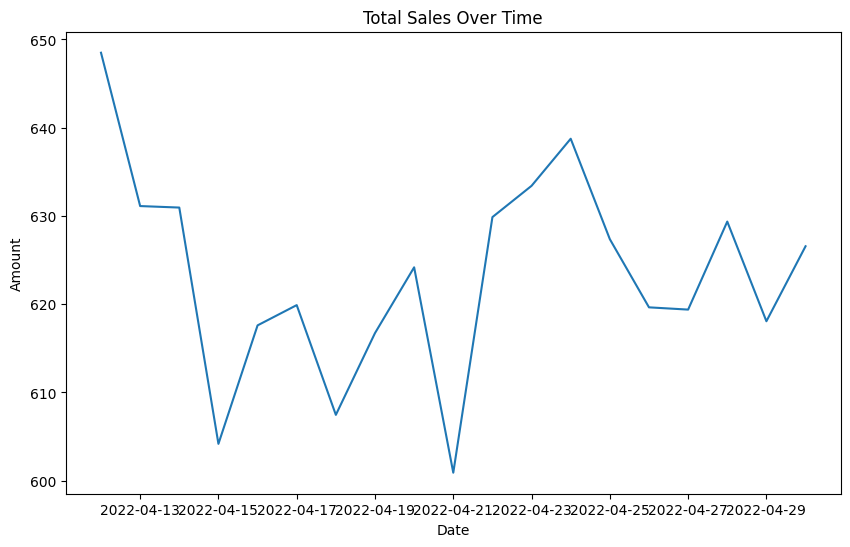


This line chart shows the sales performance from April 1,2022 to July 1,2022 
As it is showing fluctuation over the period of time.
There is no porper ups and downs in the sales trend
The peaks and valleys in the sales can suggest that there might be some facotrs affecting the sales like seasonal or cyclic factor
Whereas the spikes(sharp ups) and drops(sharp downs) in the sales can be affectted due to the events like promotions, market conditions etc


In [19]:
#PLOTTING THE LINE CHART FOR TOTAL SALES OVER TIME

plt.figure(figsize=(10, 6))              #setting the plot size
sns.lineplot(x='date', y='amt', data=df,errorbar=None)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()
print("")
print("This line chart shows the sales performance from April 1,2022 to July 1,2022 \nAs it is showing fluctuation over the period of time.\nThere is no porper ups and downs in the sales trend")
print("The peaks and valleys in the sales can suggest that there might be some facotrs affecting the sales like seasonal or cyclic factor")
print("Whereas the spikes(sharp ups) and drops(sharp downs) in the sales can be affectted due to the events like promotions, market conditions etc")

ORDER DISTRIBUTION

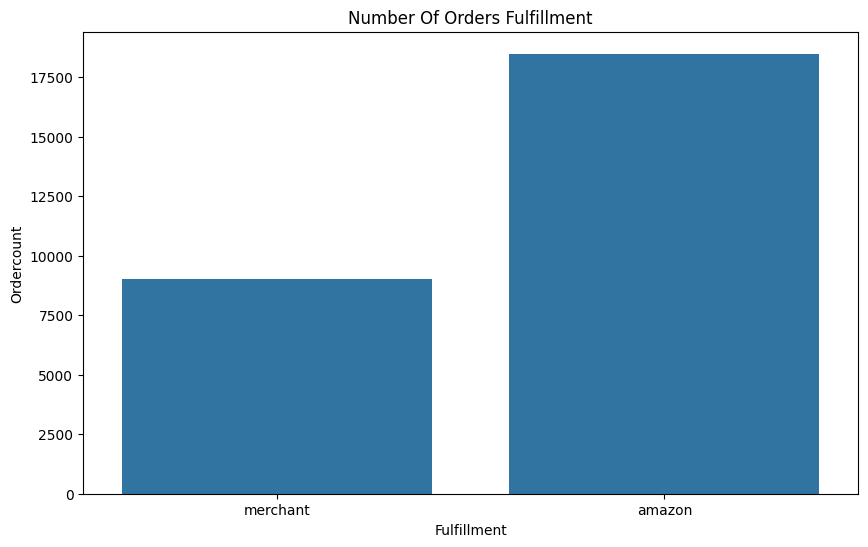


This bargraph concludes that the majority of order are fulfilled by 'AMAZON' than 'MERCHANT' 


In [21]:
# DISTRIBUTION OF ORDERS BASED ON FULFILLMENT

plt.figure(figsize=(10, 6))              #setting the plot size
sns.countplot(x='fulfillment',data=df)
plt.title('Number Of Orders Fulfillment')
plt.xlabel('Fulfillment')
plt.ylabel('Ordercount')
plt.show()
print("")
print("This bargraph concludes that the majority of order are fulfilled by 'AMAZON' than 'MERCHANT' ")

GEOGRAPHICAL ANALYSIS

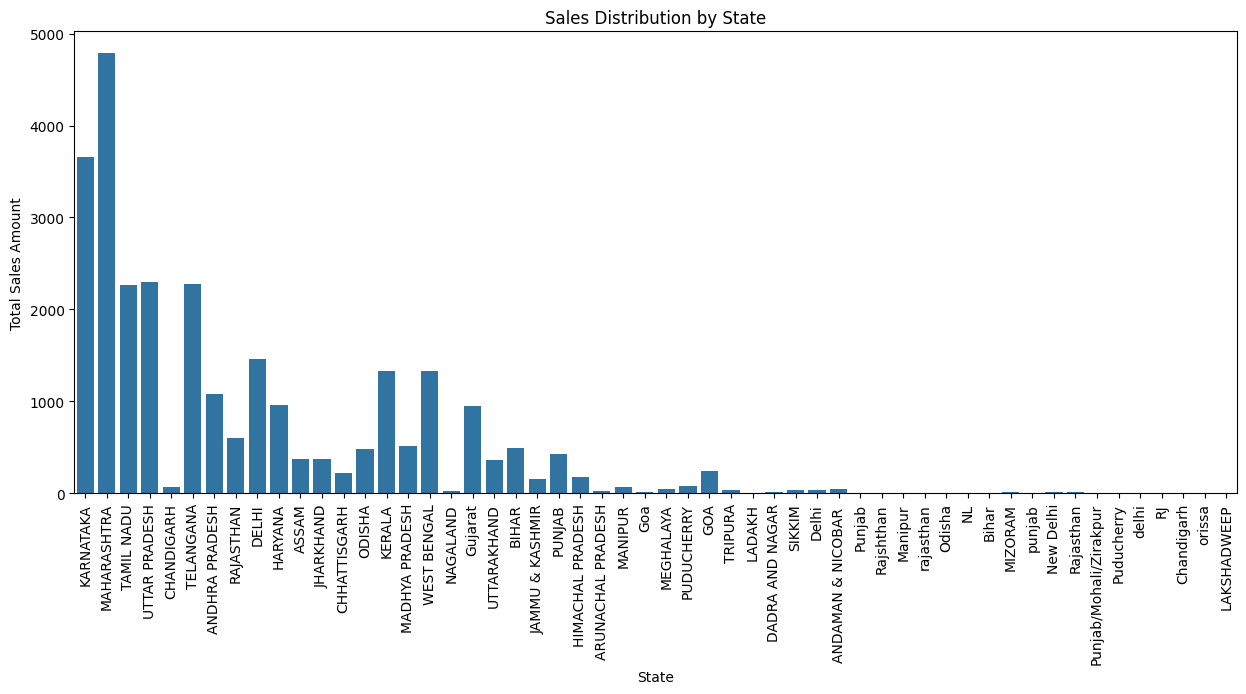


This bargraph concludes that 'MAHARASHTRA' has higher total no. of sales.
This information is crucial for strategic planning,resource allocation and optimization marketing. 


In [22]:
# DISTRIBUTION OF SALES BY STATE

plt.figure(figsize=(15, 6))              #setting the plot size
sns.countplot(x='ship_state',data=df)                  #its a type of barplot that counts the observation in each category
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.show()
print("")
print("This bargraph concludes that 'MAHARASHTRA' has higher total no. of sales.\nThis information is crucial for strategic planning,resource allocation and optimization marketing. ")

CATEGORY ANALYSIS

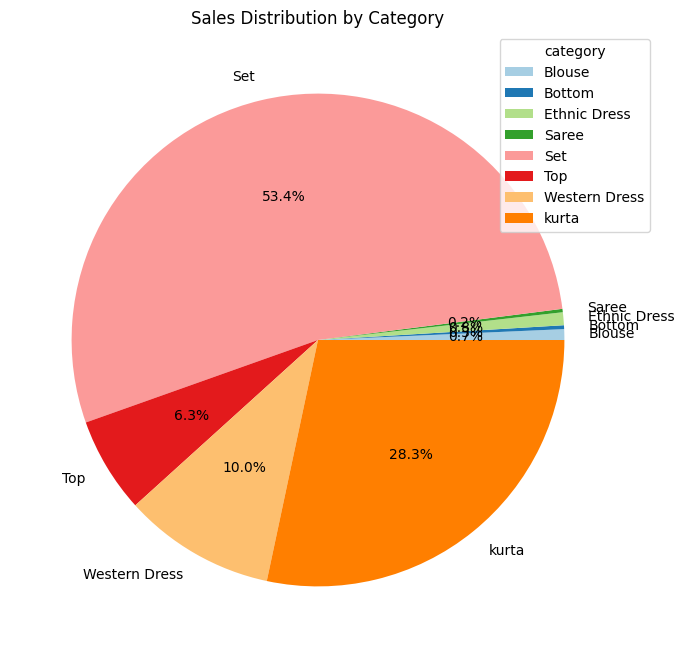


This pie chart provies a clear visualation of how the sales are distributed by category
Showing dominancy in the Set with 49.9% and the significant contribution in the Western Dress and Kurta.
This information is crucial for inventory management, marketing strategies and resource allocation.


In [23]:
# SALES DISTRIBUTION BY CATEGORY

df_grouped=df.groupby('category')['amt'].sum()
plt.figure(figsize=(10,8))
df_grouped.plot(kind='pie',autopct='%1.1f%%',title='Sales Distribution by Category',colors=plt.cm.Paired.colors, legend=True,)
plt.ylabel('')
plt.legend(title='category',loc='upper right',bbox_to_anchor=(1.05, 1))
plt.show()
print("")
print("This pie chart provies a clear visualation of how the sales are distributed by category\nShowing dominancy in the Set with 49.9% and the significant contribution in the Western Dress and Kurta.")
print("This information is crucial for inventory management, marketing strategies and resource allocation.")

QUANTITY SOLD

qty
1.0    27433
2.0       64
3.0        6
4.0        1
5.0        1
Name: count, dtype: int64


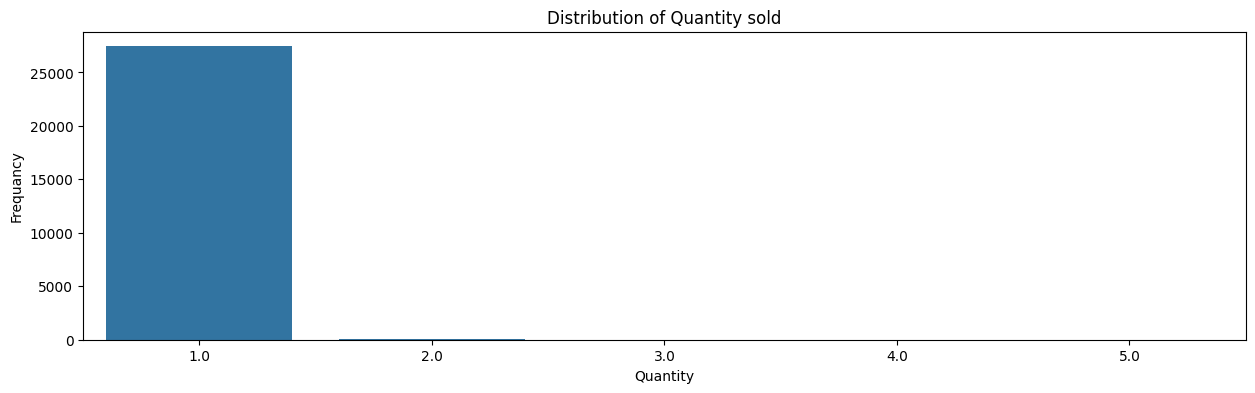


This Barplot concludes that Consumer prefer to perchase single unit quantity 
whereas qunatity units like 2,3,4,5 and 8 are much less frequent which suggests bulk purchases are rare.  


In [24]:
# DISTRIBUTION OF QTY SOLD PER UNIT

q=df['qty'].value_counts().sort_index()
print(q)

plt.figure(figsize=(15,4))
sns.barplot(x=q.index,y=q.values)
plt.xlabel('Quantity')
plt.ylabel('Frequancy')
plt.title('Distribution of Quantity sold')
plt.show()
print("")
print("This Barplot concludes that Consumer prefer to perchase single unit quantity \nwhereas qunatity units like 2,3,4,5 and 8 are much less frequent which suggests bulk purchases are rare.  ")

ORDER STATUS

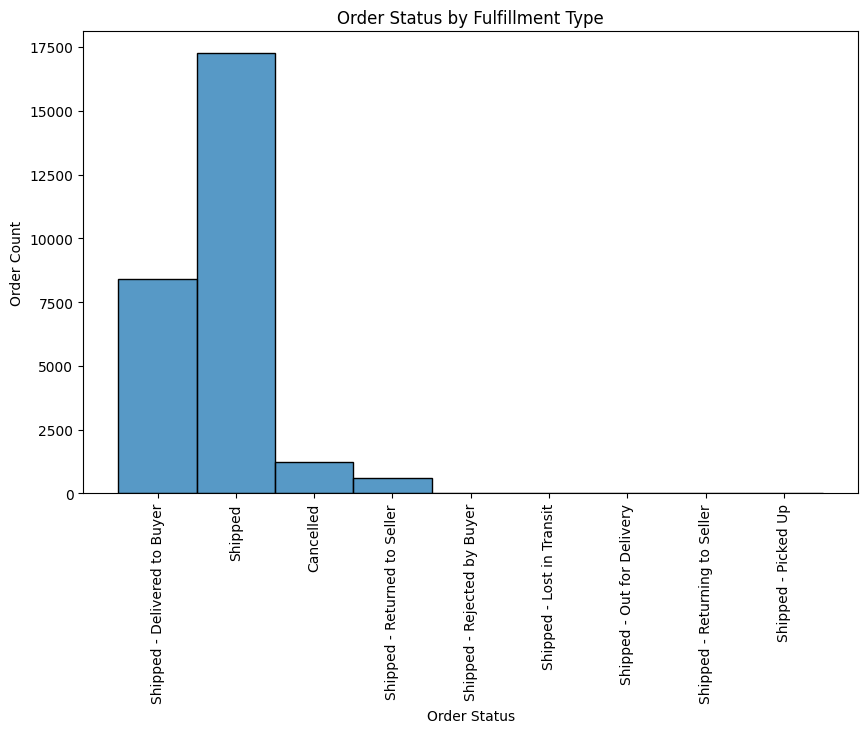


This graph concludes that majority of orders(77580)are shipped.
A significant number of order have been delivered to buyer.
Fewer order are of cancelled and returned orders.
Enhance operational efficiency and customer satisfaction by addresing the reason behind the cancellation and returns of orders


In [25]:
#ORDER STATUS BY FULFILLMENT TYPE

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='status')
plt.title('Order Status by Fulfillment Type')
plt.xlabel('Order Status')
plt.ylabel('Order Count')
plt.xticks(rotation=90)
plt.show()
print("")
print("This graph concludes that majority of orders(77580)are shipped.")
print("A significant number of order have been delivered to buyer.")
print("Fewer order are of cancelled and returned orders.")
print("Enhance operational efficiency and customer satisfaction by addresing the reason behind the cancellation and returns of orders")

CORRELATION HEATMAP

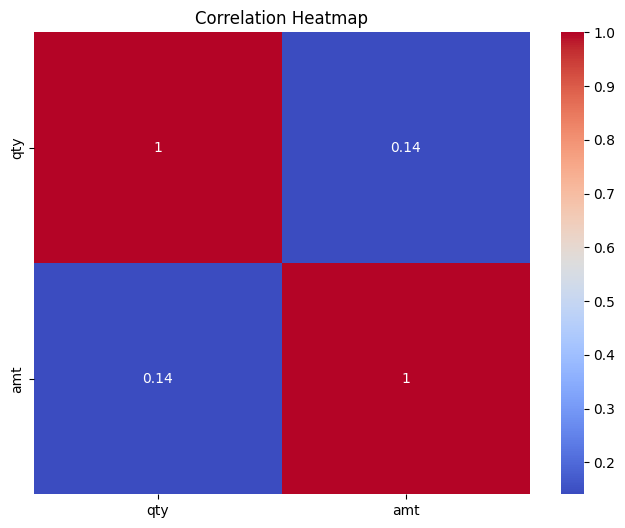


So according to the Correlation heatmap we can say that the correlation between qty and amt is "WEAK POSITIVE CORRELATION" as it is near to 0.


In [26]:
# CORRELATION BETWEEN QTY AND AMT

plt.figure(figsize=(8, 6))
sns.heatmap(df[['qty', 'amt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print("")
print('So according to the Correlation heatmap we can say that the correlation between qty and amt is "WEAK POSITIVE CORRELATION" as it is near to 0.' )

CUSTOMER ANALYSIS

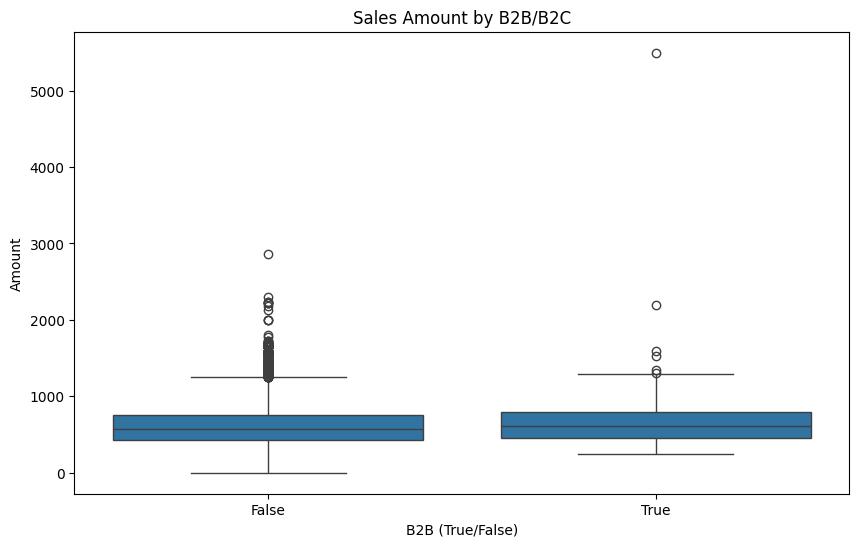


According to the Boxplot 
here's the summary:
Median Sales Amount: Both B2C and B2B have similar median sales amount indicating these two values are comparable
Interquartile Range(IQR): The spread of the middle 50% sales are similar hence the values are comparable
Outiers: B2C transactions have more high values outliers compared to B2B. However the B2B transactions have fewer but more extreme high value outliers
Spread: B2C transactions show a wider range of sales amounts, indicating more variability whereas B2B indicates less variability


In [27]:
# SALES AMT DISTRIBUTION BY B2B/B2C

plt.figure(figsize=(10, 6))
sns.boxplot(x='b2b', y='amt', data=df)
plt.title('Sales Amount by B2B/B2C')
plt.xlabel('B2B (True/False)')
plt.ylabel('Amount')
plt.show()
print()
print("According to the Boxplot \nhere's the summary:" )
print("Median Sales Amount: Both B2C and B2B have similar median sales amount indicating these two values are comparable")
print("Interquartile Range(IQR): The spread of the middle 50% sales are similar hence the values are comparable")
print("Outiers: B2C transactions have more high values outliers compared to B2B. However the B2B transactions have fewer but more extreme high value outliers")
print("Spread: B2C transactions show a wider range of sales amounts, indicating more variability whereas B2B indicates less variability")